# Sprint18 データセット作成

# ライブラリのimport

In [9]:
!pip install tensorflow==1.14.0
!pip install keras==2.2.0
!pip install keras-applications==1.0.7


     |████████████████████████████████| 42 kB 823 kB/s 
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.0.1
    Uninstalling Keras-Preprocessing-1.0.1:
      Successfully uninstalled Keras-Preprocessing-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras 2.2.0 requires keras-applications==1.0.2, but you have keras-applications 1.0.7 which is incompatible.
keras 2.2.0 requires keras-preprocessing==1.0.1, but you have keras-preprocessing 1.1.2 which is incompatible.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.
  Using cached Keras_Applications-1.0.2-py2.py3-none-any.whl (43 kB)
  Using cached Keras_Preprocessing-1.0.1-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Unins

In [10]:
!pip install -U albumentations

In [11]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                1.0.3
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl 

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import numpy as np
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
import glob
import numpy as np

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

自作のデータセットに対して分類および物体検出を行っていきます。
データセット作成の課題用コードにアクセスし、パスワード入力欄に1907を入力します。
そこから、サンプルコードをダウンロードしてください。
ダウンロードしたファイルをGoogle Colabの「ファイルを開く」からアップロードすることで、ファイルの中身を閲覧できます。


使用するデータは画像データを計10枚です。この10枚は犬と猫の画像を5枚ずつ自分で集めましょう。
このデータを使ってサンプルコードを動かし、拡張のイメージを掴んでください。
その後、下記の問題を解きましょう。

# 問題1 自作データセットでの分類の学習

自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。
例えば、分類問題はKerasチュートリアルにあるCNN等でベースモデルラインを作成しても良いですし、これまでの課題で作成したモデルでも構いません。

+ このnotebookと同階層に、sprint18_imagesフォルダを作成
+ sprint18_imagesフォルダの中に、dogフォルダを作り、その中に、dog1.jpg～dog5.jpgの犬画像を配置
+ sprint18_imagesフォルダの中に、catフォルダを作り、その中に、cat1.jpg～cat5.jpgの犬画像を配置

sprint18_imagesディレクトリの中身

          dog
              dog1.jpg
              dog2.jpg
              ・・・・
          cat
              cat1.jpg
              cat2.jpg
              ・・・

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
%pwd

'/content'

In [22]:
%ls

 firstnotebook.ipynb   Python1.ipynb   Python6.ipynb      'Sprint18 dataset'/
 np1.ipynb             Python3.ipynb  'Sprint17 YORO'/     Untitled0.ipynb
 np2.ipynb             Python5.ipynb  'Sprint17 YOROv3'/


In [23]:
%cd Sprint18 dataset

/content/drive/MyDrive/Colab Notebooks/Sprint18 dataset


In [24]:
# 基本的なグローバル変数を定義
EPOCHS = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [25]:
glob.glob(r'sprint18_images/cat/*')

['sprint18_images/cat/cat1.jpg',
 'sprint18_images/cat/cat2.jpg',
 'sprint18_images/cat/cat3.jpg',
 'sprint18_images/cat/cat4.jpg',
 'sprint18_images/cat/cat5.jpg']

In [26]:
# 画像パス
image_path_list = glob.glob(r'sprint18_images/cat/*')+glob.glob(r'sprint18_images/dog/*')

# 説明変数と目的変数格納用変数
X = []
y = []

# 画像パスでループ
for image_path in image_path_list:
    # 正解ラベルを格納
    if image_path.find('dog')!=-1:
        y.append([0])
    else:
        y.append([1])
    # 画像データを格納
    image = load_img(image_path, grayscale=False, target_size=(IMG_HEIGHT,IMG_WIDTH))
    image_array = img_to_array(image) / 255
    X.append(image_array)

# numpy配列化
X = np.array(X)
y = np.array(y)

In [27]:
# 配列の形確認
X.shape,y.shape

((10, 150, 150, 3), (10, 1))

In [28]:
# モデル定義
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
# コンパイル
model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(lr=0.001), metrics=["accuracy"])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
# 学習
model.fit(X,y, epochs=EPOCHS)


Epoch 1/15
10/10 [==============================] - 1s 102ms/step - loss: 0.6943 - acc: 0.5000
Epoch 2/15
10/10 [==============================] - 0s 37ms/step - loss: 0.9259 - acc: 0.5000
Epoch 3/15
10/10 [==============================] - 0s 34ms/step - loss: 1.2848 - acc: 0.5000
Epoch 4/15
10/10 [==============================] - 0s 34ms/step - loss: 0.8286 - acc: 0.5000
Epoch 5/15
10/10 [==============================] - 0s 36ms/step - loss: 0.5534 - acc: 1.0000
Epoch 6/15
10/10 [==============================] - 0s 34ms/step - loss: 0.5834 - acc: 0.7000
Epoch 7/15
10/10 [==============================] - 0s 36ms/step - loss: 0.4949 - acc: 0.7000
Epoch 8/15
10/10 [==============================] - 0s 36ms/step - loss: 0.5452 - acc: 0.5000
Epoch 9/15
10/10 [==============================] - 0s 34ms/step - loss: 0.3881 - acc: 0.9000
Epoch 10/15
10/10 [==============================] - 0s 34ms/step - loss: 0.3711 - acc: 0.8000
Epoch 11/15
10/10 [==============================] - 0s 3

In [30]:
# 予測
np.where(model.predict(X)<=0.5,1,0)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

# 問題2　分類データセットに対するデータ拡張

集めた画像をデータ拡張（Data Augmentation）してください。
画像を反転させたり、色を変えたり、クロッピング（一部だけ切り出す）などをしましょう。
また、下記にデータ拡張のためのライブラリがありますので、参考になりましたら幸いです。

KerasのImageDataGeneratorというデータ拡張機能を利用します。

《データ拡張のためのライブラリ》


データ拡張にはalbumentationsなどがあります。


albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries


また、Kerasを使う場合はImageDataGeneratorも便利です。


《データ拡張の効果の調査》


データ拡張にはさまざまな方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。


データを水増しされる際は、こちらの水増しテクニックについての参考論文（嬉しい日本語）などご参照ください。

https://keras.io/ja/preprocessing/image/

In [31]:
# ImageDataGeneratorのインスタンス化
image_generator = ImageDataGenerator(
    rescale=1./255,
    width_shift_range = 0.1
)

In [32]:
# ジェネレータ定義
gen_train = image_generator.flow_from_directory(
    batch_size=1,
    directory='./sprint18_images/',
    classes = ['dog', 'cat'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 10 images belonging to 2 classes.


(1, 150, 150, 3) [0.]


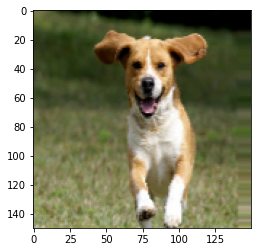

In [33]:
# 呼び出し確認
image, label = next(gen_train)

# shape確認
print(image.shape, label)

# 描画
plt.imshow(image[0])

In [34]:
# モデル定義
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
# コンパイル
model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(lr=0.001), metrics=["accuracy"])

In [35]:
# 学習
model.fit_generator(generator=gen_train, epochs=EPOCHS ,steps_per_epoch=10)

Epoch 1/15
10/10 [==============================] - 3s 280ms/step - loss: 8.0311 - acc: 0.5000
Epoch 2/15
10/10 [==============================] - 2s 191ms/step - loss: 6.3770 - acc: 0.6000
Epoch 3/15
10/10 [==============================] - 2s 190ms/step - loss: 7.9712 - acc: 0.5000
Epoch 4/15
10/10 [==============================] - 2s 192ms/step - loss: 9.5654 - acc: 0.4000
Epoch 5/15
10/10 [==============================] - 2s 192ms/step - loss: 6.3770 - acc: 0.6000
Epoch 6/15
10/10 [==============================] - 2s 191ms/step - loss: 9.5654 - acc: 0.4000
Epoch 7/15
10/10 [==============================] - 2s 192ms/step - loss: 7.9712 - acc: 0.5000
Epoch 8/15
10/10 [==============================] - 2s 194ms/step - loss: 7.9712 - acc: 0.5000
Epoch 9/15
10/10 [==============================] - 2s 195ms/step - loss: 7.9712 - acc: 0.5000
Epoch 10/15
10/10 [==============================] - 2s 194ms/step - loss: 7.9712 - acc: 0.5000
Epoch 11/15
10/10 [==============================

In [36]:
# 予測
np.where(model.predict(X)<=0.5,1,0)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

# 問題3　物体検出データセットの用意

次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。


tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images

In [37]:
# 基本的なグローバル変数を定義
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

■オリジナル（https://albumentations.ai/docs/examples/example_bboxes/）
def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)


↓↓↓↓↓↓


■修正後
def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    # x_min, y_min, w, h = bbox  # バウンディングボックス形式：coco
    # x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)  # バウンディングボックス形式：coco
    x_min, y_min, x_max, y_max = bbox  # バウンディングボックス形式：pascal_voc
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)  # バウンディングボックス形式：pascal_voc
    
    
bbox_params=A.BboxParams(format='coco', label_fields=['category_ids'])のところで
はformat='coco'→format='pascal_voc'で問題なく動きました。    

In [38]:
## BBoxを描画する関数の定義
def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    """BBox描画
    Parameters
    -------------
    img : 画像
    bbox : BBox座標
    class_id : クラスラベル
    class_idx_to_name : クラスラベルの名前
    color=BOX_COLOR : BBoxの線色
    thickness : BBoxの線太さ
    """
    x_min, y_min, x_max,  y_max = bbox
    x_min, y_min, x_max,  y_max = int(x_min), int(y_min), int(x_max),  int(y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    """複数のBBoxにも対応できる関数
    Parameters
    ----------------
    annotations : 画像とBBoxの情報
    category_id_to_name : クラスラベルとクラスラベルの名前
    """
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


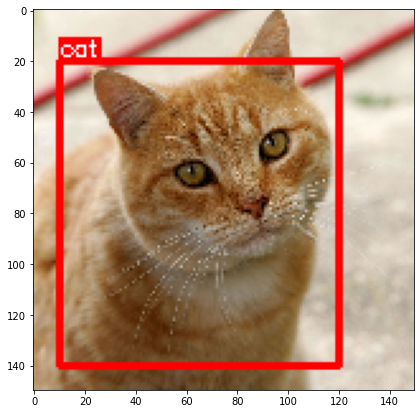

In [39]:
annotations = {'image': X[0], 'bboxes': [[10,20,120,140]], 'category_id': y[0]}
img = visualize(annotations,{0: 'dog', 1: 'cat'})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


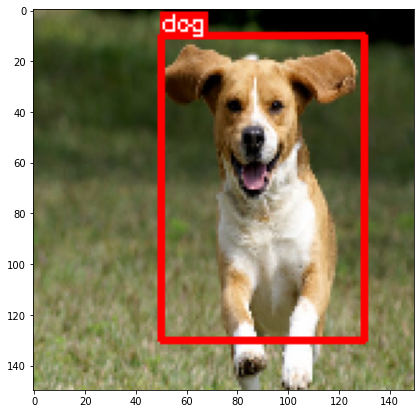

In [40]:
annotations = {'image': X[5], 'bboxes': [[50,10,130,130]], 'category_id': y[5]}
img = visualize(annotations,{0: 'dog', 1: 'cat'})

# 問題4　物体検出データセットに対するデータ拡張

データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。


xmlファイルを扱うライブラリがありますので下記をご確認ください。
xml.etree.ElementTree

albumentationsというデータ拡張ライブラリを使用する

In [41]:
# ライブラリの読み込み
import albumentations as A

In [42]:
# albumentations用にピクセル数を画像に対する割合に変更
annotations = {'image': X[5], 'bboxes': [[50/IMG_WIDTH,10/IMG_HEIGHT,130/IMG_WIDTH,130/IMG_HEIGHT]], 'category_id': y[5]}

In [49]:
# データ拡張
aug = A.Compose([
    A.RandomCrop(width=100, height=100),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='albumentations',label_fields=['category_id']))
augmented = aug(**annotations)

In [51]:
# 拡張後も割合で帰ってくるので、描画用に元に戻す
augmented['bbo],xes'] = [[
    augmented['bboxes'][0][0]*augmented['image'].shape[0],
    augmented['bboxes'][0][1]*augmented['image'].shape[1],
    augmented['bboxes'][0][2]*augmented['image'].shape[0],
    augmented['bboxes'][0][3]*augmented['image'].shape[1]
]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


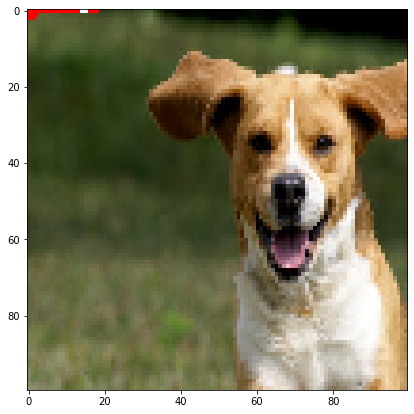

In [52]:
# 描画
visualize(augmented,{0: 'dog', 1: 'cat'})